# EXERCICE 4 : Utilisation de Pandas et sklearn pour l'analyse de donnees reeles

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython import display

## Question 1 : 
- Utiliser la fonction pandas.read_csv avec les bonnes options pour charger le fichier RealMedicalData.csv. On remarquera que le separateur dans le fichier csv est ';' et que les decimales sont representees par des virgules et non des points. Il est important de remarquer qu'un dataframe et non un numpy array sera retourne. Cette classe contient l'equivalent d'un numpy.array mais aussi le nom des lignes et colonnes, tout comme dans les dataframes de R


In [79]:
?pd.read_csv

Signature:
pd.read_csv(
    filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]],
    sep=',',
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    error_bad_lines=True,
    warn_bad_l

In [80]:
# TODO
medical_data = pd.read_csv("RealMedicalData.csv", sep=';', decimal=',')
medical_data

,Acid 1 density,Acid 2 density,Acid 3 density,Cells 1 density,Cells 2 density,Pressure 1,Pressure 2,Bio-marker 1,Bio-marker 2,Biomarker 3,Biomarker 4,Biomarker 5,Biomarker 6,Biomarker 6.1,Biomarker 7,Biomarker 8,Biomarker 9,Biomarker 10,Disease progression
0,11.6,6.4,4.30,7.2,14.4,19.26,39.32,50.00,13.040000,0.20,0.0440,2.44,2.209,9.02,0.26,1.23,3.56,16.91,6
1,15.5,10.5,4.90,6.9,13.7,8.57,36.78,22.57,18.713333,0.51,0.8501,2.32,0.339,22.43,0.10,0.56,7.06,-3.47,6
2,15.3,6.5,4.20,6.4,13.6,13.48,25.90,8.25,8.246667,0.27,0.9629,2.83,0.339,17.94,0.13,0.59,3.20,10.05,10
3,13.4,7.7,4.10,5.8,14.2,15.23,44.36,11.09,11.093333,0.67,-0.2756,5.06,1.611,11.38,0.20,0.88,4.33,-3.62,18
4,16.0,5.2,3.20,5.7,12.8,8.37,19.62,7.44,6.386667,0.24,-0.6928,1.59,0.659,8.56,0.27,1.20,4.57,1.56,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,8.9,4.8,3.45,5.6,13.5,9.18,41.71,50.00,18.213333,0.01,0.9721,1.00,0.820,12.66,0.18,0.28,5.44,6.14,6
62,18.2,5.1,3.78,5.9,13.5,11.44,33.50,42.34,11.293333,0.05,0.5524,2.45,1.384,34.88,0.07,2.19,6.75,1.75,10
63,21.0,10.3,7.00,6.6,10.8,5.78,14.53,11.09,5.460000,0.01,0.9468,2.04,1.403,21.92,0.11,0.76,2.37,1.97,13
64,11.0,4.8,3.86,5.6,13.0,7.52,20.38,9.17,7.453333,0.19,0.6871,1.92,1.006,11.49,0.20,0.51,2.34,2.11,11


- Extraire deux numpy.arrays X et y des donnes pour faire par la suite de la regression. Nous allons essayer d'expliquer  'Disease progression' avec les autres variables. Ce sera alors la colonne qui contient y. Les autres colonnes contiendront les donnees de X.

In [120]:
y_label = 'Disease progression'
y = medical_data[y_label].to_numpy()
y

array([ 6,  6, 10, 18,  7, 12,  8,  8, 10,  5,  7, 11, 10, 13, 12, 13,  6,
        8,  6, 14,  8,  6, 16, 14, 19, 10,  9,  9,  7,  6,  9,  8,  4, 11,
        8, 17, 10,  8,  4,  8,  9,  5, 13,  9, 13,  9, 11,  5, 12,  4,  9,
        3, 18,  5,  4, 15, 10,  5,  9,  6, 10,  6, 10, 13, 11,  8])

In [112]:
columns_observed = list(medical_data.columns[:-1])
X_df = medical_data[columns_observed]
X = X_df.to_numpy()
X

array([[11.6 ,  6.4 ,  4.3 , ...,  1.23,  3.56, 16.91],
       [15.5 , 10.5 ,  4.9 , ...,  0.56,  7.06, -3.47],
       [15.3 ,  6.5 ,  4.2 , ...,  0.59,  3.2 , 10.05],
       ...,
       [21.  , 10.3 ,  7.  , ...,  0.76,  2.37,  1.97],
       [11.  ,  4.8 ,  3.86, ...,  0.51,  2.34,  2.11],
       [18.5 ,  5.  ,  3.49, ...,  0.48,  4.01,  1.99]])

- Une fois X et y extrait, centrer et reduire X. La fonction sklearn.preprocessing.scale pourra etre utilisee

In [83]:
?preprocessing.scale

Signature: preprocessing.scale(X, *, axis=0, with_mean=True, with_std=True, copy=True)
Docstring:
Standardize a dataset along any axis

Center to the mean and component wise scale to unit variance.

Read more in the :ref:`User Guide <preprocessing_scaler>`.

Parameters
----------
X : {array-like, sparse matrix}
    The data to center and scale.

axis : int (0 by default)
    axis used to compute the means and standard deviations along. If 0,
    independently standardize each feature, otherwise (if 1) standardize
    each sample.

with_mean : boolean, True by default
    If True, center the data before scaling.

with_std : boolean, True by default
    If True, scale the data to unit variance (or equivalently,
    unit standard deviation).

copy : boolean, optional, default True
    set to False to perform inplace row normalization and avoid a
    copy (if the input is already a numpy array or a scipy.sparse
    CSC matrix and if axis is 1).

Notes
-----
This implementation will refuse 

In [84]:
X_center = preprocessing.scale(X)
X_center

array([[-0.39452241,  0.32973066,  0.13599835, ...,  0.58355627,
        -0.40971102,  1.80051593],
       [ 0.53841345,  3.06250605,  0.78879044, ..., -0.84133927,
         1.80003087, -0.60474976],
       [ 0.49057058,  0.39638372,  0.02719967, ..., -0.77753797,
        -0.63699875,  0.99089264],
       ...,
       [ 1.85409222,  2.92919993,  3.07356275, ..., -0.41599732,
        -1.16102326,  0.03728387],
       [-0.538051  , -0.73671827, -0.34271585, ..., -0.94767475,
        -1.1799639 ,  0.0538068 ],
       [ 1.25605642, -0.60341216, -0.74527097, ..., -1.01147604,
        -0.12560135,  0.03964429]])

## Question 2 : 
- Mettre en lien X et y a l'aide de la regression lineaire multiple avec une penalisation Lasso

In [152]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

def lasso(X_train,y_train, X_test,y_test, alpha, ax = []):
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)

    y_pred_lasso = lasso_regressor.predict(X_test)
    mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
    print(f"{alpha=}, \t {mse_score_lasso=}")

    if len(ax) > 0:
        ax[0].plot(y_test, y_pred_lasso, 'b.')
        ax[0].set_xlabel('True value')
        ax[0].set_ylabel('Predicted value')
        ax[0].set_title(f"True vs predicted value {mse_score_lasso=}")

        ax[1].plot(lasso_regressor.coef_, 'r.')
        ax[1].legend(['Beta estime'], loc='lower right')
        ax[1].set_title('Coefficients de beta')
    return lasso_regressor

alpha=0.5, 	 mse_score_lasso=16.560427194240066


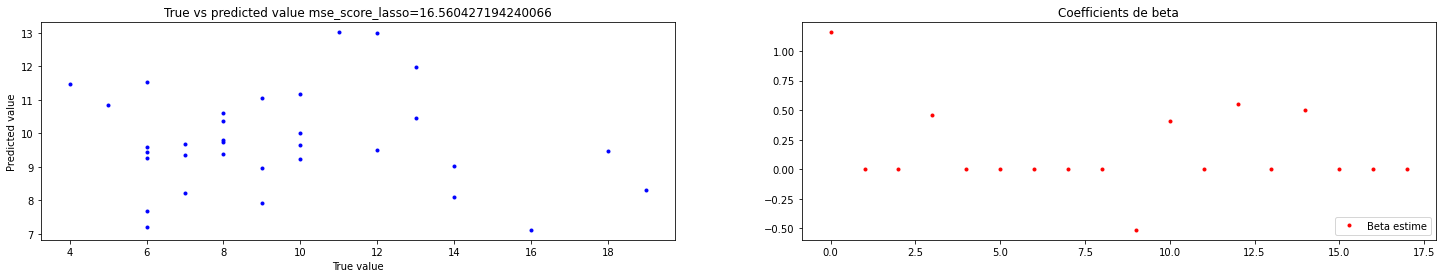

In [156]:
#  test with alpha = 0.5
thresh = len(y)//2
fig, axs = plt.subplots(1, 2, figsize=(25,4))
lasso_result = lasso(X_center[thresh:], y[thresh:], X_center[:thresh], y[:thresh], 0.5, axs)

In [166]:
from sklearn.model_selection import KFold

def k_fold(X, y, alphas, n=8):
    print(f"\n\t K-fold with alpha in {alphas}")
    kf = KFold(n_splits=n)
    for alpha in alphas:
        sum_mse_scores=0.
        for train, test in kf.split(X):
            X_train=X[train]
            y_train=y[train]
            X_test=X[test]
            y_test=y[test]
        
            lasso_regressor = Lasso(alpha=alpha)
            lasso_regressor.fit(X_train, y_train)
        
            y_pred_lasso = lasso_regressor.predict(X_test)
            mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
            sum_mse_scores+=mse_score_lasso
        print(f"{alpha=}, total: {sum_mse_scores}")



In [179]:
alphas = [0.001,0.01,0.1,1.,10.]
k_fold(X_center, y, alphas)

alphas = [0.1,0.5,0.7,1.,1.5,2.,5.]
k_fold(X_center, y, alphas)

alphas = [0.5,0.6,0.7,0.8,0.9,1.]
k_fold(X_center, y, alphas)

alphas = [0.7,0.75,0.8,0.85,0.9]
k_fold(X_center, y, alphas)

alphas = [0.73,0.75,0.77,0.8]
k_fold(X_center, y, alphas)

alphas = [0.76,0.765,0.77,0.775,0.78]
k_fold(X_center, y, alphas)



	 K-fold with alpha in [0.001, 0.01, 0.1, 1.0, 10.0]
alpha=0.001, total: 151.25523060363517
alpha=0.01, total: 148.0344072437338
alpha=0.1, total: 125.09088379838245
alpha=1.0, total: 97.45844799666574
alpha=10.0, total: 111.81419742615398

	 K-fold with alpha in [0.1, 0.5, 0.7, 1.0, 1.5, 2.0, 5.0]
alpha=0.1, total: 125.09088379838245
alpha=0.5, total: 101.08324546824626
alpha=0.7, total: 96.520840309398
alpha=1.0, total: 97.45844799666574
alpha=1.5, total: 107.74651920753638
alpha=2.0, total: 111.82617430749326
alpha=5.0, total: 111.81419742615398

	 K-fold with alpha in [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
alpha=0.5, total: 101.08324546824626
alpha=0.6, total: 97.92866532684222
alpha=0.7, total: 96.520840309398
alpha=0.8, total: 96.34988036289009
alpha=0.9, total: 96.5475179931481
alpha=1.0, total: 97.45844799666574

	 K-fold with alpha in [0.7, 0.75, 0.8, 0.85, 0.9]
alpha=0.7, total: 96.520840309398
alpha=0.75, total: 96.34540808347562
alpha=0.8, total: 96.34988036289009
alpha=0.85, tota

alpha = 0.77 seems to be pretty good

alpha=0.77, 	 mse_score_lasso=14.772512337507349


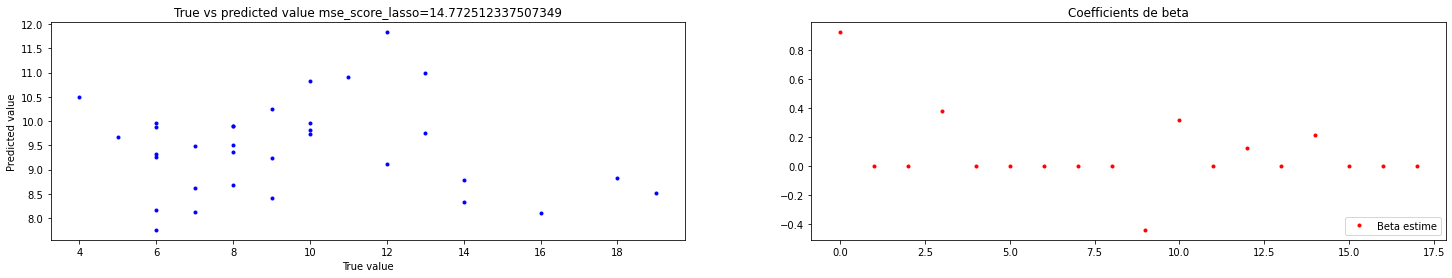

In [180]:
alpha = 0.77
thresh = len(y)//2
fig, axs = plt.subplots(1, 2, figsize=(25,4))
lasso_result = lasso(X_center[thresh:], y[thresh:], X_center[:thresh], y[:thresh], alpha, axs)

- A la vue des resultats, quelle variable vous semble liee a 'Disease progression'?

In [186]:
print("\tBeta founds")
for index, col in enumerate(columns_observed):
    print(f"{col}: \t {lasso_result.coef_[index]}")

print(f"\n\t Variables linked to '{y_label}'")
linked_labels = []
for index, col in enumerate(columns_observed):
    if abs(lasso_result.coef_[index]) > 0.5:
        linked_labels.append(col)
        print(f"{col}: \t {lasso_result.coef_[index]}")

	Beta founds
Acid 1 density: 	 0.9238889763039791
Acid 2 density: 	 0.0
Acid 3 density: 	 0.0
Cells 1 density: 	 0.3791321263453626
Cells 2 density: 	 -0.0
Pressure 1: 	 -0.0
Pressure 2: 	 -0.0
Bio-marker 1: 	 0.0
Bio-marker 2: 	 -0.0
Biomarker 3: 	 -0.43853067722369293
Biomarker 4: 	 0.31677818987442835
Biomarker 5: 	 -0.0
Biomarker 6: 	 0.1258449823815663
Biomarker 6.1: 	 -0.0
Biomarker 7: 	 0.21270903956488993
Biomarker 8: 	 -0.0
Biomarker 9: 	 0.0
Biomarker 10: 	 0.0

	 Variables linked to 'Disease progression'
Acid 1 density: 	 0.9238889763039791


- Verifier cette relation en representant des nuages de points mettant en lien les observations de chaque variable avec les observations de 'Disease progression'

In [187]:
# Select part of the df with linked variables
linked_var = X_df[linked_labels]
linked_var

,Acid 1 density
0,11.6
1,15.5
2,15.3
3,13.4
4,16.0
...,...
61,8.9
62,18.2
63,21.0
64,11.0


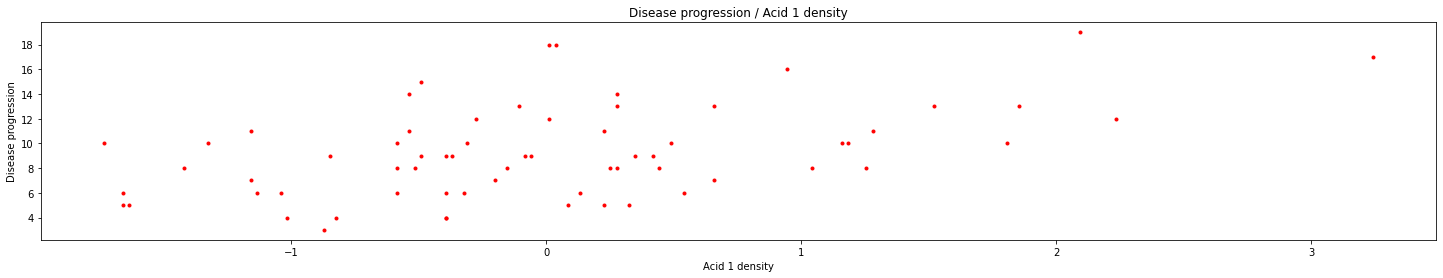

In [190]:
fig, axs = plt.subplots(1, len(linked_labels), figsize=(25,4))
for index, col in enumerate(linked_labels):
    axs.plot(preprocessing.scale(linked_var[col]), y, 'r.')
    axs.set_xlabel(f"{col}")
    axs.set_ylabel(f"{y_label}")
    axs.set_title(f"{y_label} / {col}")

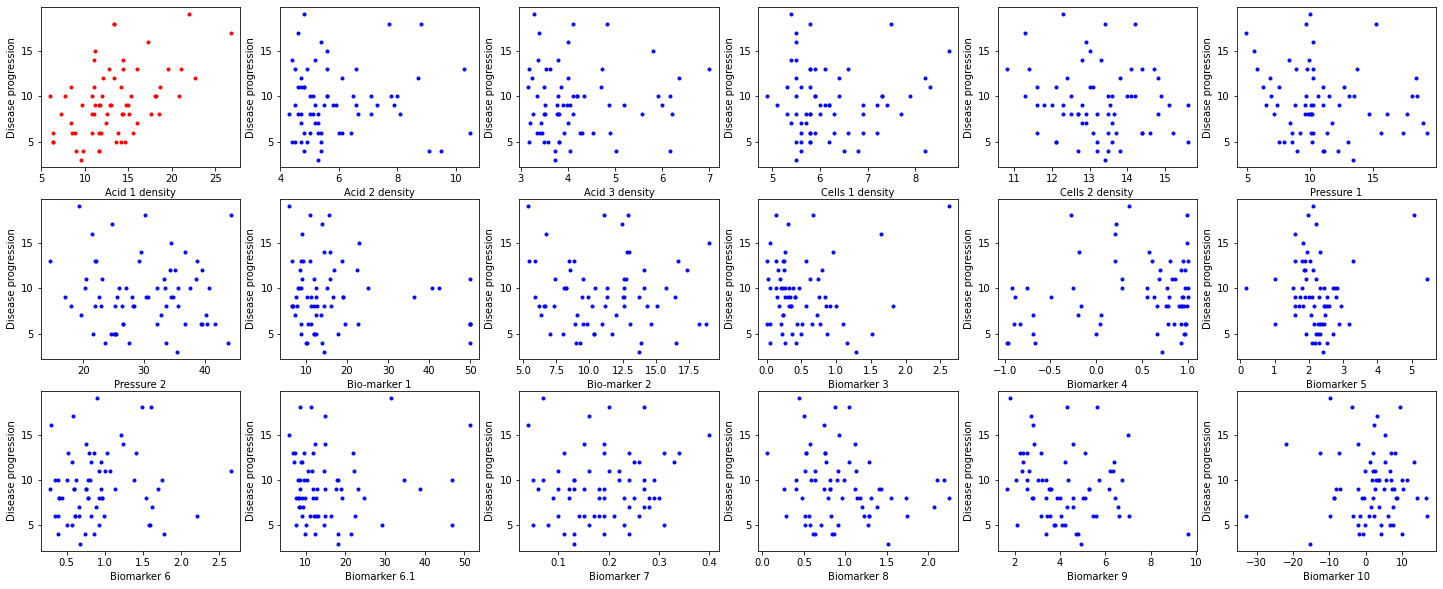

In [192]:
fig, axs = plt.subplots(len(columns_observed)//6, 6, figsize=(25,10))
for index, col in enumerate(columns_observed):
    marker = 'r.' if col in linked_labels else 'b.'
    axs[index//6, index%6].plot(medical_data[col], y, marker)
    axs[index//6, index%6].set_xlabel(f"{col}")
    axs[index//6, index%6].set_ylabel(f"{y_label}")
    # axs[index//6, index%6].set_title(f"{y_label} / {col}")